<a href="https://colab.research.google.com/github/effection00/ds-section1-sprint2/blob/master/n121a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 2 / NOTE 1*

# 📝 Assignment

# 가설 검정

## 1. One-Sample T-test 연습

### 데이터 불러오기
- [서울시 가로수 데이터셋](https://data.seoul.go.kr/dataList/367/S/2/datasetView.do)을 사용합니다.

다음 링크를 참조하세요. 
<https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/seoul_tree/seoul_tree.txt>


In [87]:
import pandas as pd

# 이 곳에 답안을 작성하시기 바랍니다

data = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/seoul_tree/seoul_tree.txt',sep='\t')


In [88]:
#@title
data.columns = data.iloc[0]
data = data.drop([0],axis= 0)
data = data.replace({'-':0})

In [89]:
data.head()

,기간,자치구,노선수,수량,은행나무,양버즘나무,느티나무,왕벚나무,은단풍나무,메타세콰이어,회화나무,가죽나무,감나무,수양버들,튜울립나무,칠엽수,포플러,느릅나무,살구나무,무궁화,소나무,목련,이팝나무,기타
1,2019,서울시,"1,412","307,351","108,050","62,474","37,473","34,150",545,"5,171","7,816",52,871,32,948,"1,533",7,504,234,"2,374","4,539",378,"20,088","20,112"
2,2019,종로구,70,"7,329","4,072","1,071",619,421,0,1,140,1,0,8,0,17,0,0,0,0,239,0,711,29
3,2019,중구,48,"8,250","3,640",162,460,289,0,0,176,0,0,0,7,0,0,0,21,46,"2,162",0,470,817
4,2019,용산구,39,"7,835","4,444","1,422",373,262,0,0,37,0,74,0,13,16,0,0,39,0,51,126,198,780
5,2019,성동구,38,"8,120","1,090","2,401","1,975",602,29,48,325,33,146,0,0,1,3,59,0,0,53,0,709,646


### "서울시에는 구별로 평균 약 400 그루 정도의 `이팝나무`가 있다"라는 가설에 대해 가설검정을 시행하세요.

- 단, `서울시`, `공원녹지사업소`, `시설관리공단` 부분의 데이터는 제외합니다.
- 가설검정 결과의 pvalue 값을 `pv1`에 저장하세요. (`.pvalue` 사용)

In [90]:
import numpy as np
# 이 곳에 답안을 작성하시기 바랍니다
tree1 = pd.to_numeric(data['이팝나무'].str.replace(',',''))

# 서울시 구별 이팝나무
tree1 = tree1.iloc[1:26]
tree1

2      711
3      470
4      198
5      709
6      760
7     1176
8      449
9      853
10     575
11      47
12     142
13     443
14     493
15    1280
16     784
17    1426
18    1082
19     184
20    1281
21     397
22     249
23     446
24     768
25    1651
26     642
Name: 이팝나무, dtype: int64

In [91]:
from scipy import stats
import scipy
scipy.__version__
!pip install --upgrade scipy
#실제 평균
np.mean(tree1)
tt_est = stats.ttest_1samp(tree1, 400)

#p-value 값
pv1 = tt_est.pvalue
pv1

#가설 검정 결과
# p-value(유의수준) 0.05(1-95%) 기준 -- 0.002 (< 0.5)이므로 귀무가설은 기각
# 서울시는 통계적으로 구별 평균 이팝나무 수는 400그루가 아니다

Requirement already up-to-date: scipy in /usr/local/lib/python3.7/dist-packages (1.6.3)


0.002470712850935819

### 이번에는 10개의 구를 샘플링하여, 위에 대한 가설검정을 다시 한번 시행해보세요.

- 단, 아래의 코드를 참조하여 sample을 위한 seed 는 123로 설정하세요.
- 가설검정 결과의 pvalue값을 `pv2`에 저장하세요


In [92]:
import numpy as np
np.random.seed(123)

#10개 tree 추출
ten_tree = np.random.choice(tree1, size = 10)  # "~"와 " "을 적절한 값으로 채우시면 됩니다
ten_tree

array([1280,  198,  198,  449,  184,  397,  142,  768,  470,  711])

In [101]:
#실제 평균
np.mean(ten_tree)
tt_est2 = stats.ttest_1samp(ten_tree, 400) 

pv2 = tt_est2.pvalue
pv2

#가설 검정 결과
# p-value(유의수준) 0.05(1-95%) 기준 -- 0.002 (< 0.5)이므로 귀무가설은 기각
# 서울시는 통계적으로 구별 평균 이팝나무 수는 400그루가 아니다

0.49772576203804575

## 2. Two-Sample T-test 연습

### "서울시의 구별 평균 느티나무수와 왕벚나무의 수는 차이가 없다"라는 가설에 대해 가설검정을 시행하세요.

- 단, `서울시`, `공원녹지사업소`, `시설관리공단` 부분의 데이터는 제외합니다.
- 가설검정 결과의 pvalue를 `pv3`에 저장하세요

In [94]:
tree2 = pd.to_numeric(data['느티나무'].str.replace(',',''))
tree3 = pd.to_numeric(data['왕벚나무'].str.replace(',',''))

# 귀무가설 : 평균 느티나무 수 = 왕벚나무 수
# 대립가설 : 평균 느티나무 수 =x 왕벚나무 수


# 이 곳에 답안을 작성하시기 바랍니다
tree2 = tree2.iloc[1:26]
tree3 = tree3.iloc[1:26]

#실제 평균
np.mean(tree2)
np.mean(tree3)

#검정 결과 
pv3 = stats.ttest_ind(tree2,tree3).pvalue 

pv3 
# p값이 0.6455(>0.05)이므로 통계적으로 느타나무 수와 왕벚나무 수의 차이가 없다고 볼 수 있다

0.6455096880085703


### Two-Sample One-tailed test를 사용하여 **평균 느티나무수가 왕벚나무 수보다 크다**라는 가설에 대한 가설검정을 시행하세요.
- 해당 가설검정의 결과를 `ans`에 저장하세요.

이 때 `ans`가 가질 수 있는 값은 아래와 같습니다 :
1. "느티나무" ( 느티나무의 수가 통계적으로 유의하게 많은 경우 )
2. "왕벚나무" ( 왕벚나무의 수가 통계적으로 유의하게 많은 경우 )
3. "없음" (통계적으로 유의하지 않은 경우)

다음 링크를 참조하세요.
<https://stackoverflow.com/questions/15984221/how-to-perform-two-sample-one-tailed-t-test-with-numpy-scipy>

In [95]:
# 이 곳에 답안을 작성하시기 바랍니다

#tree2 느티나무 tree3 왕벚나무
# 귀무가설 : 왕벚나무 = 느티나무
# 대립가설 : 왕벚나무 > 느티나무
pv4 = stats.ttest_ind(tree2,tree3)
# one tail 단측검정

one_tail = pv4[1]/2
a = 0.05

if one_tail < a:
  ans = '왕벚나무'
else: 
  ans = '없음'
ans
#0.3227(>0.05)이므로 통계적으로 왕벚나무와 느티나무 수는 차이가 없다

'없음'

## 🔥 **도전과제**
> 3문제 모두 하면 됩니다.



### 1. Compare mean for multiple-sample 
 
다음 링크를 참조하세요. <https://reneshbedre.github.io/blog/anova.html>

구별, 은행나무, 양버즘나무, 느티나무에 대해서 ANOVA Test를 실행하세요.

단, `서울시`, `공원녹지사업소`, `시설관리공단` 부분의 데이터는 제외합니다.

In [96]:
#정수
data['양버즘나무'] = pd.to_numeric(data['양버즘나무'].str.replace(',',''))
data['은행나무'] = pd.to_numeric(data['은행나무'].str.replace(',',''))
data['느티나무'] = pd.to_numeric(data['느티나무'].str.replace(',',''))

In [97]:
anova = pd.concat([data['자치구'],data['양버즘나무'],data['은행나무'],data['느티나무']],axis=1)
anova = anova.loc[2:26,['자치구','은행나무','양버즘나무','느티나무']]
anova

from scipy.stats import f_oneway
fstat, p_val = f_oneway(anova['양버즘나무'], anova['은행나무'], anova['느티나무'])
fstat, p_val

#귀무가설 : 구별 양버즘,은행, 느티 나무 수는 차이가 없다
#대립가설 : 구별 양버즘,은행, 느티 나무 수는 차이가 있다
# P값이 8.93(>0.05)이므로 구별 양버즘,은행, 느티 나무의 수는 통계적으로 차이가 없다

(17.006289557888046, 8.935183167883698e-07)

### 2. Sampling

- 세션 시간에 배웠던 4가지 sample 방식을 구현해보세요.

- 이를 위한 데이터는 1 부터 100 이며, sampling해야 하는 수는 20개 입니다.

- Stratified random sampling을 위한 그룹을 나누는 기준은 1-10, 11-20, ... 과 같은 방식입니다.

- Cluster sampling 을 위한 그룹을 나누는 기준은 5로 나눴을때의 나머지 값입니다. (0,1,2,3,4)

In [98]:
from sklearn.model_selection import StratifiedShuffleSplit
# 이 곳에 답안을 작성하시기 바랍니다

#무작위
#1.Simple random sampling
np.random.randint(1,100,size=20)

#2.Systematic sampling

#3.Stratified random sampling


#4.클러스터 기준은 5로 나눈 나머지 값




array([48, 74, 33, 47, 97, 26, 84, 79, 37, 97, 81, 69, 50, 56, 68,  3, 85,
       40, 67, 85])

### 3. Data transform
다음 링크를 참조하여  `Inverse transform sampling` 을 구현합니다.

<https://youtu.be/9ixzzPQWuAY>

0 ~ 1 의 값을 동일한 확률로 갖는 `uniform distribution`으로 부터 `binomial distribution`으로 transform 하는 코드를 작성한 뒤, 두가지 결과를 시각화를 통해 비교하세요.


(array([17., 18., 19., 18., 16., 17., 17., 14., 21., 16., 14., 14., 13.,
        19., 19., 26., 20., 27., 24., 25., 19., 24., 23., 26., 22., 20.,
        24., 23., 27., 20., 19., 20., 24., 16., 18., 18., 13., 26., 21.,
        18., 22., 23., 18., 27., 25., 19., 20., 14., 12., 25.]),
 array([9.04559704e-04, 2.08599245e-02, 4.08152893e-02, 6.07706541e-02,
        8.07260189e-02, 1.00681384e-01, 1.20636748e-01, 1.40592113e-01,
        1.60547478e-01, 1.80502843e-01, 2.00458208e-01, 2.20413572e-01,
        2.40368937e-01, 2.60324302e-01, 2.80279667e-01, 3.00235032e-01,
        3.20190396e-01, 3.40145761e-01, 3.60101126e-01, 3.80056491e-01,
        4.00011855e-01, 4.19967220e-01, 4.39922585e-01, 4.59877950e-01,
        4.79833315e-01, 4.99788679e-01, 5.19744044e-01, 5.39699409e-01,
        5.59654774e-01, 5.79610139e-01, 5.99565503e-01, 6.19520868e-01,
        6.39476233e-01, 6.59431598e-01, 6.79386963e-01, 6.99342327e-01,
        7.19297692e-01, 7.39253057e-01, 7.59208422e-01, 7.79163786e-

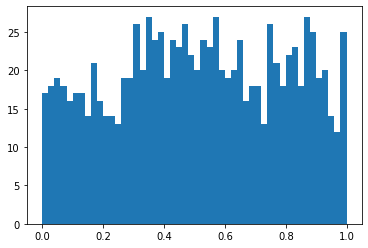

In [99]:
# 이 곳에 답안을 작성하시기 바랍니다

import matplotlib.pyplot as plt

uniform = np.random.uniform(0,1,1000)
plt.hist(uniform,50)




(array([512.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 488.]),
 array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
        0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
        0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333,
        1.        ]),
 <a list of 15 Patch objects>)

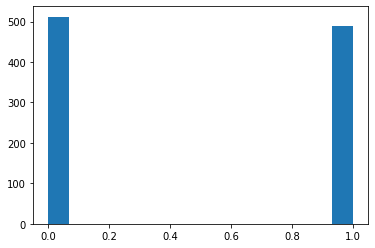

In [100]:
bino = np.random.binomial(1, 0.5, size=1000)
plt.hist(bino, 15)